In [1]:
# SKLEARN DIABETES DATASET

# Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood 
#serum measurements were obtained for each of n = 442 diabetes patients, as well as the 
#response of interest, a quantitative measure of disease progression one year after baseline.
# the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1).

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
diabetes=load_diabetes()

In [2]:
diabetes.data.shape


(442, 10)

In [3]:
# the variables are named

# AGE SEX BMI BP S1 S2 S3 S4 S5 S6
diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## first get the data into a DataFrame

In [4]:
diab=pd.DataFrame(diabetes.data)
diab.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# add columns's names 
diab.columns=diabetes.feature_names
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
# target is the column of values to predict
# represents the progression of the disease one year after baseline
diabetes.target.shape

(442,)

In [7]:
# add a progression column to diab
diab['progression']=diabetes.target
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


##  simple visualization of relationships

In [8]:
diab.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Text(0.5,1,'Relationship AGE and DIABETES')

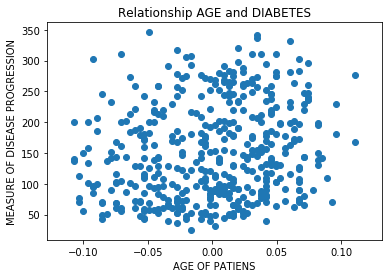

In [9]:
# correlation between AGE and DISEASE PROGRESSION is 0.1879
plt.scatter(diab.age,diab.progression)
plt.xlabel("AGE OF PATIENS")
plt.ylabel("MEASURE OF DISEASE PROGRESSION")
plt.title("Relationship AGE and DIABETES")

Text(0.5,1,'Relationship BODY MASS INDEX and DIABETES')

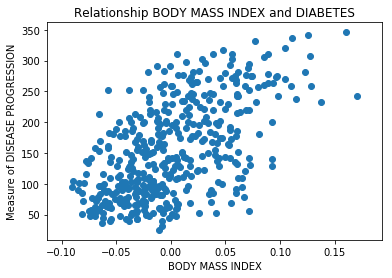

In [10]:
# correlation betwwen BODY MASS INDEX and DISEASE PROGRESSION is 0.5865
plt.scatter(diab.bmi,diab.progression)
plt.xlabel("BODY MASS INDEX")
plt.ylabel("Measure of DISEASE PROGRESSION")
plt.title("Relationship BODY MASS INDEX and DIABETES")

Text(0.5,1,'Relationship BP and DIABETES')

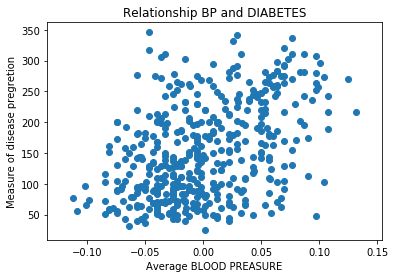

In [11]:
# correlation between BLOOD PREASURE and DISEASE PROGRESSION is 0.4415
plt.scatter(diab.bp,diab.progression)
plt.xlabel("Average BLOOD PREASURE")
plt.ylabel("Measure of disease pregretion")
plt.title("Relationship BP and DIABETES")

## linear regression

In [12]:
from statsmodels.formula.api import ols

In [13]:
res=ols("progression~bmi",diab).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            progression   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           3.47e-42
Time:                        16:55:03   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

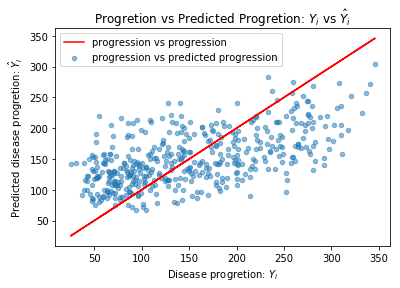

In [14]:
# linear regression considering just bmi
plt.scatter(diab.progression,res.fittedvalues,s=20,alpha=0.5)
plt.plot(diab.progression,diab.progression,'r')
plt.xlabel("Disease progretion: $Y_i$")
plt.ylabel("Predicted disease progretion: $\hat{Y}_i$")
plt.title("Progretion vs Predicted Progretion: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='upper left',labels=("progression vs progression","progression vs predicted progression"))

In [15]:
# linear regression with sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [16]:
# X is a DataFrame with no "progression" column
X=diab.drop("progression",axis=1)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [17]:
# regression with all features
lr.fit(X,diab.progression)
print('intercept: ',lr.intercept_,'\ncoef: ',lr.coef_)

intercept:  152.1334841628965 
coef:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [18]:
# DataFrame with the coefficient value for each feature
coefficients=pd.DataFrame(list(zip(X.columns,lr.coef_)),columns=["feature","coef"])
coefficients

,feature,coef
0,age,-10.012198
1,sex,-239.819089
2,bmi,519.839787
3,bp,324.390428
4,s1,-792.184162
5,s2,476.745838
6,s3,101.044570
7,s4,177.064176
8,s5,751.279321
9,s6,67.625386


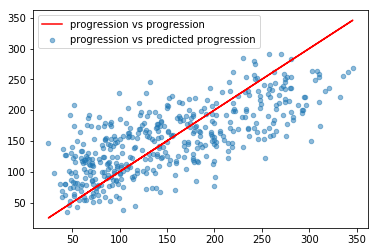

In [19]:
# true progression of disease vs predicted progression
plt.scatter(diab.progression,lr.predict(X),s=20,alpha=0.5)
plt.plot(diab.progression,diab.progression,'r')
plt.legend(("progression vs progression","progression vs predicted progression"))

In [20]:
# MEAN SQUARED ERROR
MSE = np.mean((diab.progression - lr.predict(X)) ** 2)
print('MSE: ',MSE)

MSE:  2859.6903987680657


In [21]:
# MEAN ABSOLUTE ERROR
MAE=np.mean(np.absolute(diab.progression-lr.predict(X)))
print('MAE: ', MAE)

MAE:  43.27739508374988


In [22]:
lr=LinearRegression()
lr.fit(X[['bmi']],diab.progression)
MSE_bmi=np.mean((lr.predict(X[['bmi']])-diab.progression)**2)
print('MSE (bmi):', MSE_bmi)

MSE (bmi): 3890.4565854612724


In [23]:
lr=LinearRegression()
lr.fit(X[['bmi','bp','s5']],diab.progression)
MSE=np.mean((lr.predict(X[['bmi','bp','s5']])-diab.progression)**2)
print('MSE (bmi bp s5): ',MSE)

MSE (bmi bp s5):  3083.0490338631253


In [24]:
lr=LinearRegression()
lr.fit(X[['bmi','bp','s5','s3']],diab.progression)
MSE=np.mean((lr.predict(X[['bmi','bp','s5','s3']])-diab.progression)**2)
print('MSE (bmi bp s3 s5 ): ',MSE)

MSE (bmi bp s3 s5 ):  3015.3533549287736


## predicting progression of disease

In [25]:
# split the data into train and test sets
# using train_test_split
# random_state is the seed for random number generator
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
X,diab.progression,test_size=0.25,random_state=0)

### regression model based on the training set

In [26]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
predic_train=lr.predict(X_train)
predic_test=lr.predict(X_test)
MSE_train=np.mean((predic_train-Y_train)**2)
MSE_test=np.mean((predic_test-Y_test)**2)
print('MSE_train: ',MSE_train,'\nMSE_test: ',MSE_test)

MSE_train:  2780.062316059081 
MSE_test:  3180.1988368427274


Text(0,0.5,'error')

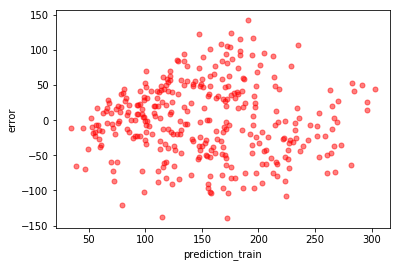

In [42]:
plt.scatter(predic_train,predic_train-Y_train,c='r', s=25, alpha=0.5)
plt.xlabel("prediction_train")
plt.ylabel("error")


Text(0,0.5,'error')

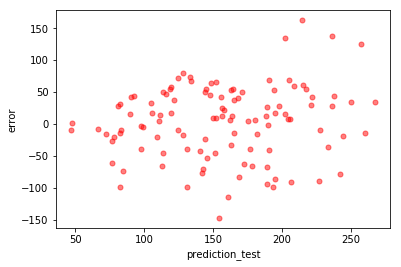

In [45]:
plt.scatter(predic_test,predic_test-Y_test,c='r', s=25, alpha=0.5)
plt.xlabel("prediction_test")
plt.ylabel("error")